In [12]:
using Revise

In [13]:
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\gvdeynde\Documents\Repositories\Deepburn.jl`


In [14]:
#Pkg.rm("Optim")

In [15]:
using BenchmarkTools
#using CairoMakie
using PyPlot

In [16]:
using Deepburn

In [32]:
CF = CarathéodoryFejér(14, prec=512);

In [33]:
print(CF)

Carathéodory-Fejér  order = 14
r_inf = 1.8321743857133563625394091365808547425146429088418071166164035480880088728330146200276884149934769946326987976245426979937678675340815586638482835241298095e-14
alpha
-7.15428806359364479894373101608187718716369674147830799024733958620210107168867944525527409994769470293704572446148130450991659232382665998463117321836706688e-05 - 0.0001436104334954308884648429450480952917131055252983250960042923370941393414969398im
0.00943902531073969896230984031483940910322763266626288039885680041297688686799894223066148618876706832947336021022327199716430594904397570268141193964216923054 + 0.017184791958484803729524617849655113136453623451042904691646554520667060690304946942373660153099709865636349309817970396362453813554121515229669312942112287im
-0.376360038782344277264764854221235834278480469675988945051715035420869284722735647057913260713216804581394048764185248704203511726504471886350756598285073542 - 0.335183470294518647820260413983632086986006359026848435

In [37]:
res = cra_extrema(CF, prec=1024)

(BigFloat[-1849.249704038151936966603370910427241499767923805751616379553349510773942897438755361760850708994699525680085606378648436131821912556071892722233297131308739806984122442258916998206858199668197237010475620180240103684488164354046920907756642738140122882920085691816090170159368127968448104052647685050559242758, -467.497372618727445819019448497680428044953262837672623368308288914405035648544031795248450869826651600412568578593548972283956569402679890002864865570467887068719664897643696846249934308846393680000790048060751216534887360205175553568409808810768506778686658411734863547127226097315656645180795780450828927544, -211.5686651154148919256624271915286926901441669071569187021372333454383612749983477595662537178631813921245264337444303523082494331337050286035653785757773920761158195592126950693407152291764772599630599811338303693660243562141617089462429211529857700120313687597006963096966461033046483927675674345176967466647, -121.92700853705267755893203603403549097329807570

In [38]:
pmin = -7
pmax = 7
x = -(10.) .^ range(pmin,pmax, 20001)
xticks = -10. .^ range(pmin,pmax, step=1);

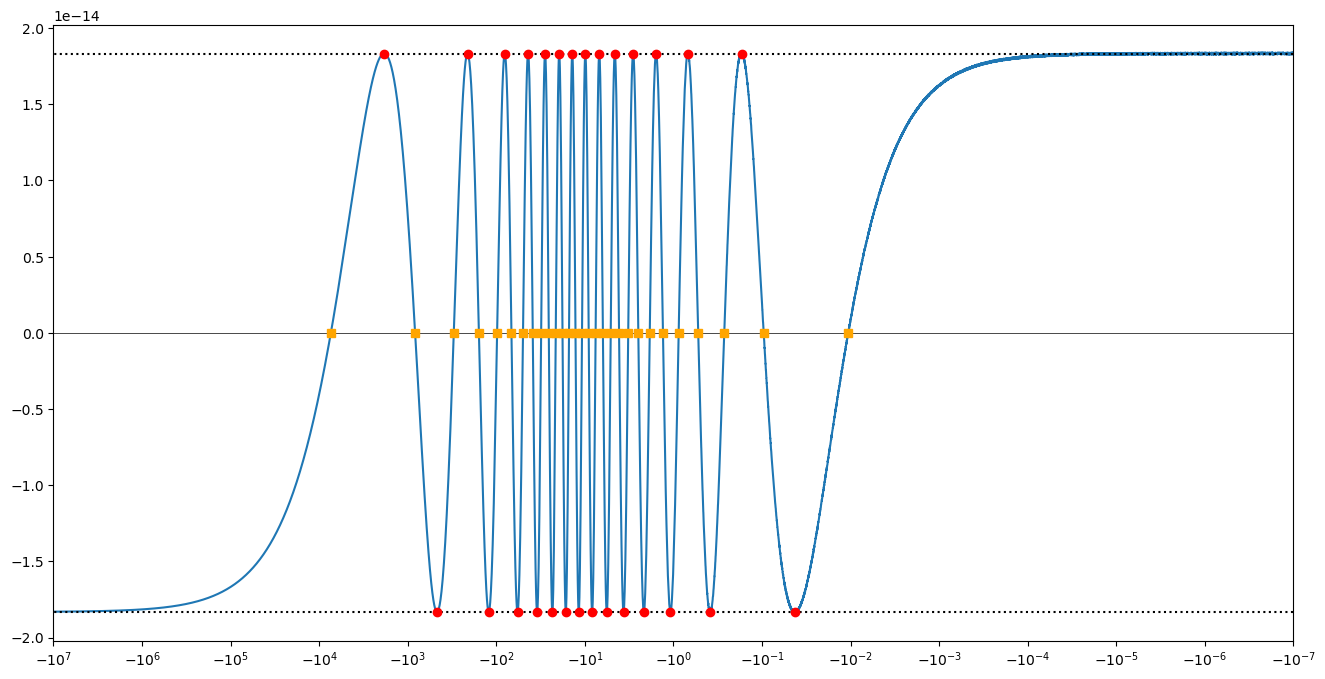

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001A9832B41F0>

In [39]:
figure(figsize=[16,8])
plot(x,cra_abs_error(CF,x))#, prec=256))
xlim([last(xticks), xticks[1]])
xscale("symlog", linthresh=1e-300)
plot([-10. .^ pmin, -10. .^ pmax], [CF.rinf, CF.rinf], ":", color="k")
plot([-10. .^ pmin, -10. .^ pmax], [-CF.rinf, -CF.rinf], ":", color="k")
plot([-10. .^ pmin, -10. .^ pmax], [0,0], "-", color="k", lw=0.5)

plot(res[1], cra_abs_error(CF, res[1]), "o", color="red")
plot(res[2], zeros(length(res[2])), "s", color="orange")
